# Hackathon 1, statistics.

This project illustrates the course LEPL1109. You will study the emission of PM2.5 fine particles in Shanghai and Beijing, measured by US embassy/offices. PM2.5 refers to atmospheric particulate matter (PM) that have a diameter less than 2.5 micrometers. In other words, it's used as a measure of pollution. 


## Report content

•	Grades are granted to the members whose names are in the Jupyter notebook. If your name doesn’t appear on the top of the notebook, you’ll get a 0, even though you are in a group on Moodle.

•	The jupyter notebook must be compiled with printed results and next submitted via moodle. The absence of compiled results (or non-printed values) leads to a lower grade.

•	Do not comment your results directly into cells of code. Use instead a Markdown cell. 

•	"Dry" code or results not followed by a minimum of analysis / comments will be penalized.


## Report submission

•	Deadline, see moodle website. Submission after the deadline will not be accepted.

•	To submit your report, go to the section “Hackathons” on Moodle and the subsection “Remise Hackathon 1”. You can upload your work there. Once you are sure that it is your final version, click the button “Envoyer le devoir”. It is important that you don’t forget to click on this button ! 

•	Reports that have not been uploaded through Moodle will not be corrected.


## Names and Noma of participants:

Part. 1: 

Part. 2:

Part. 3:

Part. 4:

Part. 5: Edouard Meurant

Part. 6:


# Air quality in China


PM2.5 consists of airborne particles with aerodynamic diameters less than 2.5 μm. They are known to adversely affect human
health. The U.S. Embassy in Beijing started releasing hourly PM2.5 readings in April 2008, followed by the consulates in Guangzhou, Shanghai, Chengdu, and Shenyang in November and December 2011, June 2012, and April 2013, respectively. China’s Ministry of Environmental Protection (MEP) began to report hourly PM2.5 data in 74 cities (which include the five cities with the U.S. diplomatic posts) from January 2013, which was extended to 338 cities in January 2015.

The time period for this data is between Jan 1st, 2010 to Dec 31st, 2015. Missing data are denoted as NA.

* No: row number
* year: year of data in this row
* month: month of data in this row
* day: day of data in this row
* hour: hour of data in this row
* season: season of data in this row
* PM: PM2.5 concentration (µg/m^3)
* DEWP: Dew Point (Celsius Degree)
* TEMP: Temperature (Celsius Degree)
* HUMI: Humidity (%)
* PRES: Pressure (hPa)
* cbwd: Combined wind direction
* Iws: Cumulated wind speed (m/s)
* precipitation: hourly precipitation (mm)
* Iprec: Cumulated precipitation (mm)

Reference: 

Liang, X., S. Li, S. Zhang, H. Huang, and S. X. Chen (2016), PM2.5 data reliability, consistency, and air quality assessment in five Chinese cities, J. Geophys. Res. Atmos., 121, 10220-10236.


## 1. Basic statistics


------------------------------------------------------------------------------------------------------
1.1. We will focus on PM2.5 hourly measurements done by the US offices between the 1/1/2012 and 31/12/2015 in Beijing and Shanghai. 

a) Load datasets and merge them. Take care to remove missing data (NA) and keep only days for which PM2.5 emissions are available **both** in Shanghai and Beijing (PM_US_Post). Notice that in a later question, you will also need PM2.5 emissions measured in Nongzhanguan.

Use the field 'season' to split the data of Shanghai and Bejing into:
* one sample for winter (season=4), 
* one sample for summer (season=2).
------------------------------------------------------------------------------------------------------

In [2]:
# Code here
import pandas as pd

# Load datasets
beijing = pd.read_csv('BeijingPM.csv')
shanghai = pd.read_csv('ShanghaiPM.csv')

# Remove rows with missing PM2.5 data (NA) for 'PM_US Post' in both datasets
beijing_clean = beijing.dropna(subset=['PM_US Post'])
shanghai_clean = shanghai.dropna(subset=['PM_US Post'])

# Merge the two datasets based on year, month, day, and hour
# Adding suffixes to differentiate columns between the two cities
df = pd.merge(beijing_clean, shanghai_clean, on=['year', 'month', 'day', 'hour'], suffixes=('_bj', '_sh'))

# Split the data into winter (season=4) and summer (season=2) samples
# Both cities need to have matching seasons



winter_data = df[(df['season_bj'] == 4) & (df['season_sh'] == 4)]
summer_data = df[(df['season_bj'] == 2) & (df['season_sh'] == 2)]


b) Calculate the mean, variance, median, 25% and 75% quantiles of emissions during winter and summer in Shanghai and Beijing. Present them in clean table. Comment your results.

In [3]:
import pandas as pd

from IPython.display import display

def quantile_25(x):
    return x.quantile(0.25)

def quantile_75(x):
    return x.quantile(0.75)

# Calcul des statistiques pour Beijing et Shanghai pendant l'hiver
stats_winter_bj = winter_data['PM_US Post_bj'].agg(['mean', 'var', 'median', quantile_25, quantile_75]).rename(index={'<lambda_0>': '25%', '<lambda_1>': '75%'})
stats_winter_sh = winter_data['PM_US Post_sh'].agg(['mean', 'var', 'median', quantile_25, quantile_75]).rename(index={'<lambda_0>': '25%', '<lambda_1>': '75%'})
# agg(['mean', 'var', 'median']) : Cette partie demande à pandas de calculer la moyenne, la variance et la médiane pour la colonne PM_US Post_bj
# Calcul des statistiques pour Beijing et Shanghai pendant l'été
stats_summer_bj = summer_data['PM_US Post_bj'].agg(['mean', 'var', 'median', quantile_25, quantile_75]).rename(index={'<lambda_0>': '25%', '<lambda_1>': '75%'})
stats_summer_sh = summer_data['PM_US Post_sh'].agg(['mean', 'var', 'median', quantile_25, quantile_75]).rename(index={'<lambda_0>': '25%', '<lambda_1>': '75%'})

# Créer une table propre avec les résultats
result = pd.DataFrame({
    'Winter Beijing': stats_winter_bj,
    'Winter Shanghai': stats_winter_sh,
    'Summer Beijing': stats_summer_bj,
    'Summer Shanghai': stats_summer_sh
})

display(result)

,Winter Beijing,Winter Shanghai,Summer Beijing,Summer Shanghai
mean,122.426914,76.194737,71.840843,33.891807
var,15509.299838,3341.130873,2978.227347,611.481485
median,82.000000,60.000000,59.000000,29.000000
quantile_25,21.000000,36.000000,30.000000,16.000000
quantile_75,180.000000,99.000000,100.000000,46.000000


Comments here:

* en hiver il y a plus de pollution 
* On voit qu'en hiver il y a une grande variance ce qui fait sense puisque une grande variance signifie qu'il y a une forte dispersion ou une grande variabilité dans les données autour de la moyenne. Cela peut être dû à des pics de pollution importants. (du au chauffage/rechauffement)



-----------------------------------------------------------------------------------------------------------------------

1.2. Draw box plots of PM2.5 emissions in Beijing and Shanghai / summer & winter (in total 4 box plots).

Search on internet, what are the recommended maximum level of PM2.5 and comment your results.

------------------------------------------------------------------------------------------------------------------------



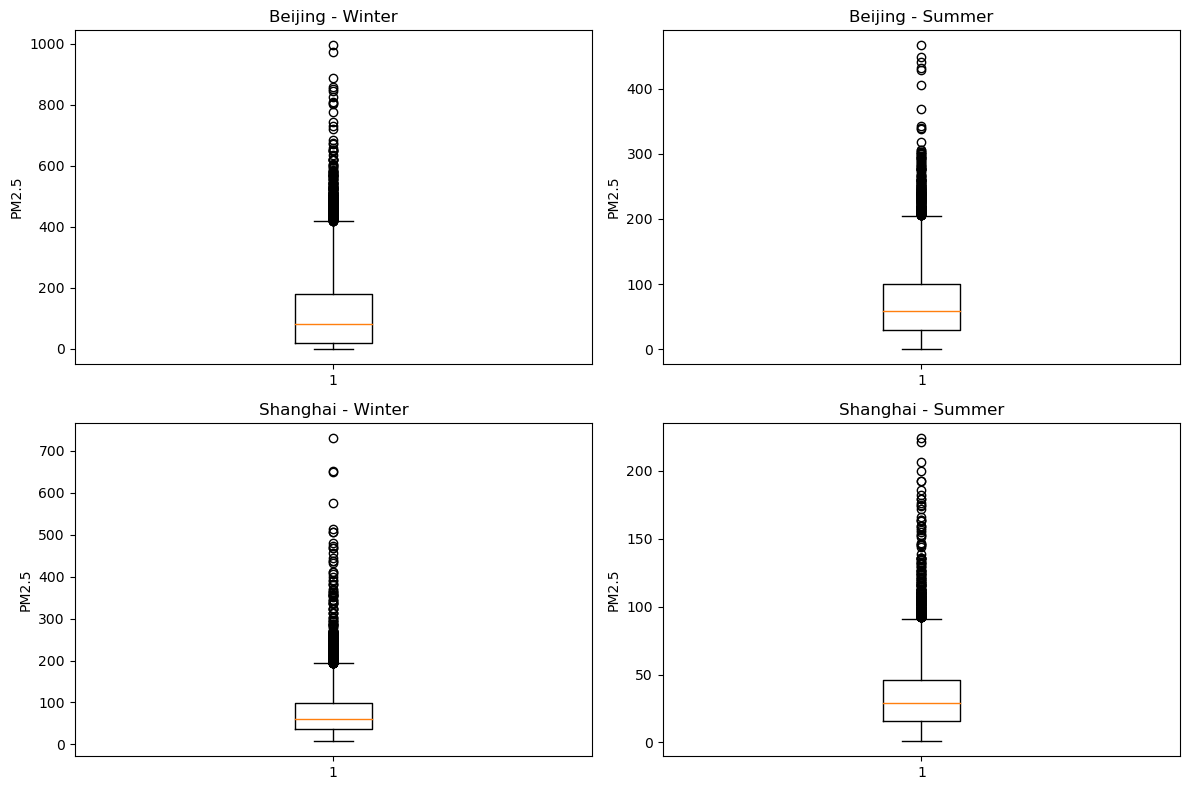

In [4]:
import pandas as pd
import matplotlib.pyplot as plt


plt.figure(figsize=(12, 8))

# Box plot pour Beijing en hiver
plt.subplot(2, 2, 1)
plt.boxplot(winter_data['PM_US Post_bj'].dropna())
plt.title('Beijing - Winter')
plt.ylabel('PM2.5')

# Box plot pour Beijing en été
plt.subplot(2, 2, 2)
plt.boxplot(summer_data['PM_US Post_bj'].dropna())
plt.title('Beijing - Summer')
plt.ylabel('PM2.5')

# Box plot pour Shanghai en hiver
plt.subplot(2, 2, 3)
plt.boxplot(winter_data['PM_US Post_sh'].dropna())
plt.title('Shanghai - Winter')
plt.ylabel('PM2.5')

# Box plot pour Shanghai en été
plt.subplot(2, 2, 4)
plt.boxplot(summer_data['PM_US Post_sh'].dropna())
plt.title('Shanghai - Summer')
plt.ylabel('PM2.5')


plt.tight_layout()


plt.show()



Comments here:


## 2. Fit of distributions 


------------------------------------------------------------------------------------------------------

2.1. Fit a Gamma distribution to PM2.5 emissions in Beijing and Shanghai (winter & summer). Warning, in python, the Gamma distribution has a parameter of location which translate the distribution from $[0,+\infty)$ to $[loc,+\infty)$. Force its value to zero during the calibration (option floc=0) to consider only positive values.

a) Estimate Gamma parameters by log-likelihood maximization (MLE). Present them in a clean table **AND** calculate the log-likelihood.  

------------------------------------------------------------------------------------------------------

In [5]:

import numpy as np
from scipy import stats



# Fonction pour fitter une distribution Gamma et calculer les paramètres et la log-vraisemblance
def fit_gamma_distribution(data):
    # Ajuster la distribution Gamma (MLE)
    params = stats.gamma.fit(data, floc=0)  # Forcer loc=0 (floc=0)
    
    # Estimer les parametres
    alpha, loc, beta = params
    
    # Calculer la log-vraisemblance
    log_likelihood = np.sum(stats.gamma.logpdf(data, alpha, loc=0, scale=beta))
    
    return alpha, beta, log_likelihood


params_winter_bj = fit_gamma_distribution(winter_data['PM_US Post_bj'])
params_summer_bj = fit_gamma_distribution(summer_data['PM_US Post_bj'])
params_winter_sh = fit_gamma_distribution(winter_data['PM_US Post_sh'])
params_summer_sh = fit_gamma_distribution(summer_data['PM_US Post_sh'])


results = pd.DataFrame({
    'Location': ['Beijing - Winter', 'Beijing - Summer', 'Shanghai - Winter', 'Shanghai - Summer'],
    'Alpha': [params_winter_bj[0], params_summer_bj[0], params_winter_sh[0], params_summer_sh[0]],
    'Beta': [params_winter_bj[1], params_summer_bj[1], params_winter_sh[1], params_summer_sh[1]],
    'Log-Likelihood': [params_winter_bj[2], params_summer_bj[2], params_winter_sh[2], params_summer_sh[2]]
})



display(results)

,Location,Alpha,Beta,Log-Likelihood
0,Beijing - Winter,0.945554,129.476386,-48542.152092
1,Beijing - Summer,1.700798,42.239487,-43175.928971
2,Shanghai - Winter,2.249619,33.870058,-43318.213798
3,Shanghai - Summer,1.758744,19.270458,-36870.989338


b) Plot the 4 histograms of PM2.5 and add the fitted gamma pdf’s on the same plot. What is your overall feeling about the quality of estimation?

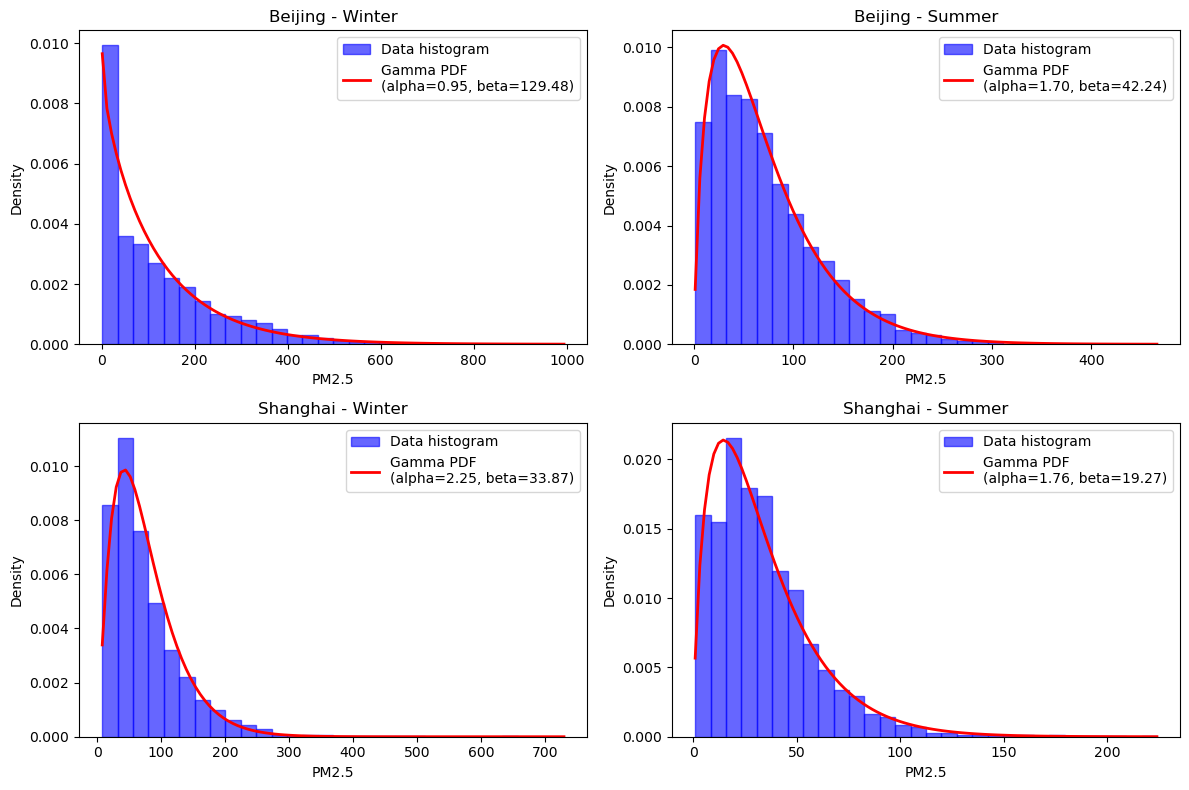

In [6]:
# Fonction pour tracer un histogramme et superposer la PDF ajustée de la distribution Gamma
def plot_histogram_with_gamma(data, alpha, beta, title):
    # Tracer l'histogramme normalisé
    # bins = 30 : 30 intervals égaux
    # density=True : histogram normalisé
    # alpha = opacité
    plt.hist(data, bins=30, density=True, alpha=0.6, color='blue', edgecolor = "blue", label="Data histogram")
    
    # Créer une plage de valeurs pour tracer la fonction de densité (PDF)
    x = np.linspace(min(data), max(data), 100)
    
    # Tracer la PDF ajustée de la distribution Gamma
    plt.plot(x, stats.gamma.pdf(x, alpha, loc=0, scale=beta), 'r-', lw=2, label=f'Gamma PDF\n(alpha={alpha:.2f}, beta={beta:.2f})')
    
    
    plt.title(title)
    plt.xlabel('PM2.5')
    plt.ylabel('Density')
    plt.legend()

plt.figure(figsize=(12, 8))

# Beijing - Hiver
plt.subplot(2, 2, 1)
plot_histogram_with_gamma(winter_data['PM_US Post_bj'], 
                          params_winter_bj[0], params_winter_bj[1], 
                          "Beijing - Winter")

# Beijing - Été
plt.subplot(2, 2, 2)
plot_histogram_with_gamma(summer_data['PM_US Post_bj'], 
                          params_summer_bj[0], params_summer_bj[1], 
                          "Beijing - Summer")

# Shanghai - Hiver
plt.subplot(2, 2, 3)
plot_histogram_with_gamma(winter_data['PM_US Post_sh'], 
                          params_winter_sh[0], params_winter_sh[1], 
                          "Shanghai - Winter")

# Shanghai - Été
plt.subplot(2, 2, 4)
plot_histogram_with_gamma(summer_data['PM_US Post_sh'], 
                          params_summer_sh[0], params_summer_sh[1], 
                          "Shanghai - Summer")


plt.tight_layout()
plt.show()


Comments here:


------------------------------------------------------------------------------------------------------

2.2. You have fitted 4 gamma random variables to PM2.5 emissions in Shanghai, Beijing during summer and winter.

* Present the anatytical formulas of the mean and standard deviation of a gamma distribution. Calculate the expected levels and the standard devations of the PM2.5 emissions (in Shanghai, Beijing during summer and winter) relying on the fitted gamma random variables. 
* Calculate the 25%, 50% and 75% percentiles of these gamma distributions.
* Compare your results with the empirical statistics previously computed. Please comment your results.

------------------------------------------------------------------------------------------------------

In [7]:
# Code here


Comments here:



------------------------------------------------------------------------------------------------------

2.3. The quality of the MLE estimators depends upon many factors. One way to estimate it is to bootstrap the dataset. We will focus here exclusively on PM2.5 emissions in Beijing, during the winter time.

* Bootstrap 1000 times a sample of 6000 daily emissions for Beijing (winter) and plot an histogram of estimated alpha and scale parameters.

* Compute a 5% confidence interval for parameter(s) estimates for the best distribution obtained by MLE. 

* How do you interpret the results? Is the accuracy good?

------------------------------------------------------------------------------------------------------

In [8]:
#Code here


Comments here:


## 3. Regression and forecasting 

------------------------------------------------------------------------------------------------------

3.1. In this question, you will determine if PM2.5 emissions levels depends upon weather conditions. We focus
on emissions measured by the US embassy in Beijing, during winter.

Regress PM2.5 emissions in Beijing (season 4) with respect to:
 * DEWP: Dew Point (Celsius Degree)
 * TEMP: Temperature (Celsius Degree)
 * HUMI: Humidity (%)
 * PRES: Pressure (hPa)
 * cbwd: Combined wind direction
 * Iws: Cumulated wind speed (m/s)
 * precipitation: hourly precipitation (mm)

The variable 'cbwd' is categorical. Convert it into dummy variables (0 or 1) with panda.get_dummies. Do not forget to drop one modality of this variable. Remove lines from the dataset with NaN entries.

* Use the OLS() function of the package statsmodels.api to perform the linear regression. 
* Comment your results (goodness of fit, R2, F-stat and T-stats of coefficients)
* Answer this : Does high hourly precipitation (mm) mitigate PM2.5 emissions?

------------------------------------------------------------------------------------------------------

In [9]:
#Code here


Comments here:


------------------------------------------------------------------------------------------------------

3.2. We design a simple auto-regressive model for predicting the PM 2.5 emissions over the next hour, in Beijing, measured at the US embassy (warning, we consider emissions between the 1/1/2012 and 31/12/2015 and during all seasons).

Let us denote by E(t) the emission at time 't'. We an autoregressive model defined as follows:

$$E(t) = \sum_{k=1}^{3} a_k E(t-k) $$

a. We split the dataset into a training set (the first 75% of data included) and a validation set (the remaining 25%).

b.	Estimate this model with statsmodels on the training set. 

c.	Analyze statistics reported by statsmodel.

------------------------------------------------------------------------------------------------------

In [10]:
# Code here


Comments here:

------------------------------------------------------------------------------------------------------

3.3. Use this model on the test set to forecast the PM2.5 hourly emissions on the test set.

a. Compare on a graph, the forecast to real emissions.

b. Plot the errors of prediction. Are they acceptable? Compute the mean absolute error (MAE) of prediction on the training and test sets.
 
------------------------------------------------------------------------------------------------------

In [11]:
# Code here


Comments here:


## 4. Hypothesis tests

------------------------------------------------------------------------------------------------------
4.1. You will compare the average PM2.5 emissions measured at the US embassy in Beijing (PM_US Post_y), during winter with emissions reported by Chinese authorities in Nongzhanguan (PM_Nongzhanguan), a district of Beijing close to the US embassy.

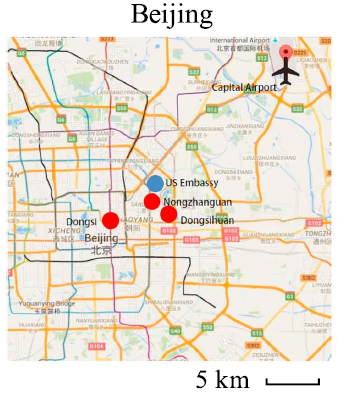


a) Reload the data from 'BeijingPM.csv' file. Keep data from the 1/1/2012 and 31/12/2015 in winter time(season 4). Take care to remove missing data (NA) and keep only days for which PM2.5 emissions are available **both** in Nongzhanguan (PM_Nongzhanguan) and Beijing (PM_US Post), to keep the same number of observations.

------------------------------------------------------------------------------------------------------

In [12]:
# Code here


b) Perfom a  the Stutent's T test to check if the average hourly PM2.5 emissions are the same in Nongzhanguan and at the US embassy. The null hypothesis is

$H_0$: $\mu_{US} = \mu_{Nongzhanguan}$.

Use a confidence level of 5%. Take care to comment your conclusions. Are all assumptions required to perform this test sastisfied?


In [13]:
# Code here


Comment here:


c) Explain the Wilcoxon's test. What is the main advantage of this test compared to the Student's T test. Why is this useful in our project? 

Comment here:

d) Apply the Wilcoxon's test to distributions of the hourly PM2.5 emissions in Nongzhanguan and at the US embassy. What can you conclude ?

In [14]:
# Code here


Comment here:

